In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics 
sns.set(rc={'figure.figsize':(12,20)})

df=pd.read_csv('winequalityN.csv')
print(df.head())



    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [2]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


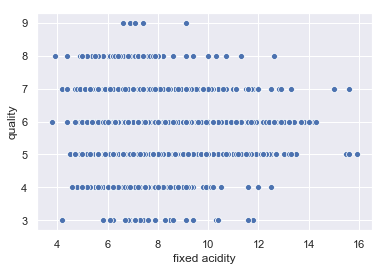

In [3]:
sns.scatterplot(data=df, x='fixed acidity', y='quality')

C:\Users\boukr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\boukr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\boukr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\boukr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

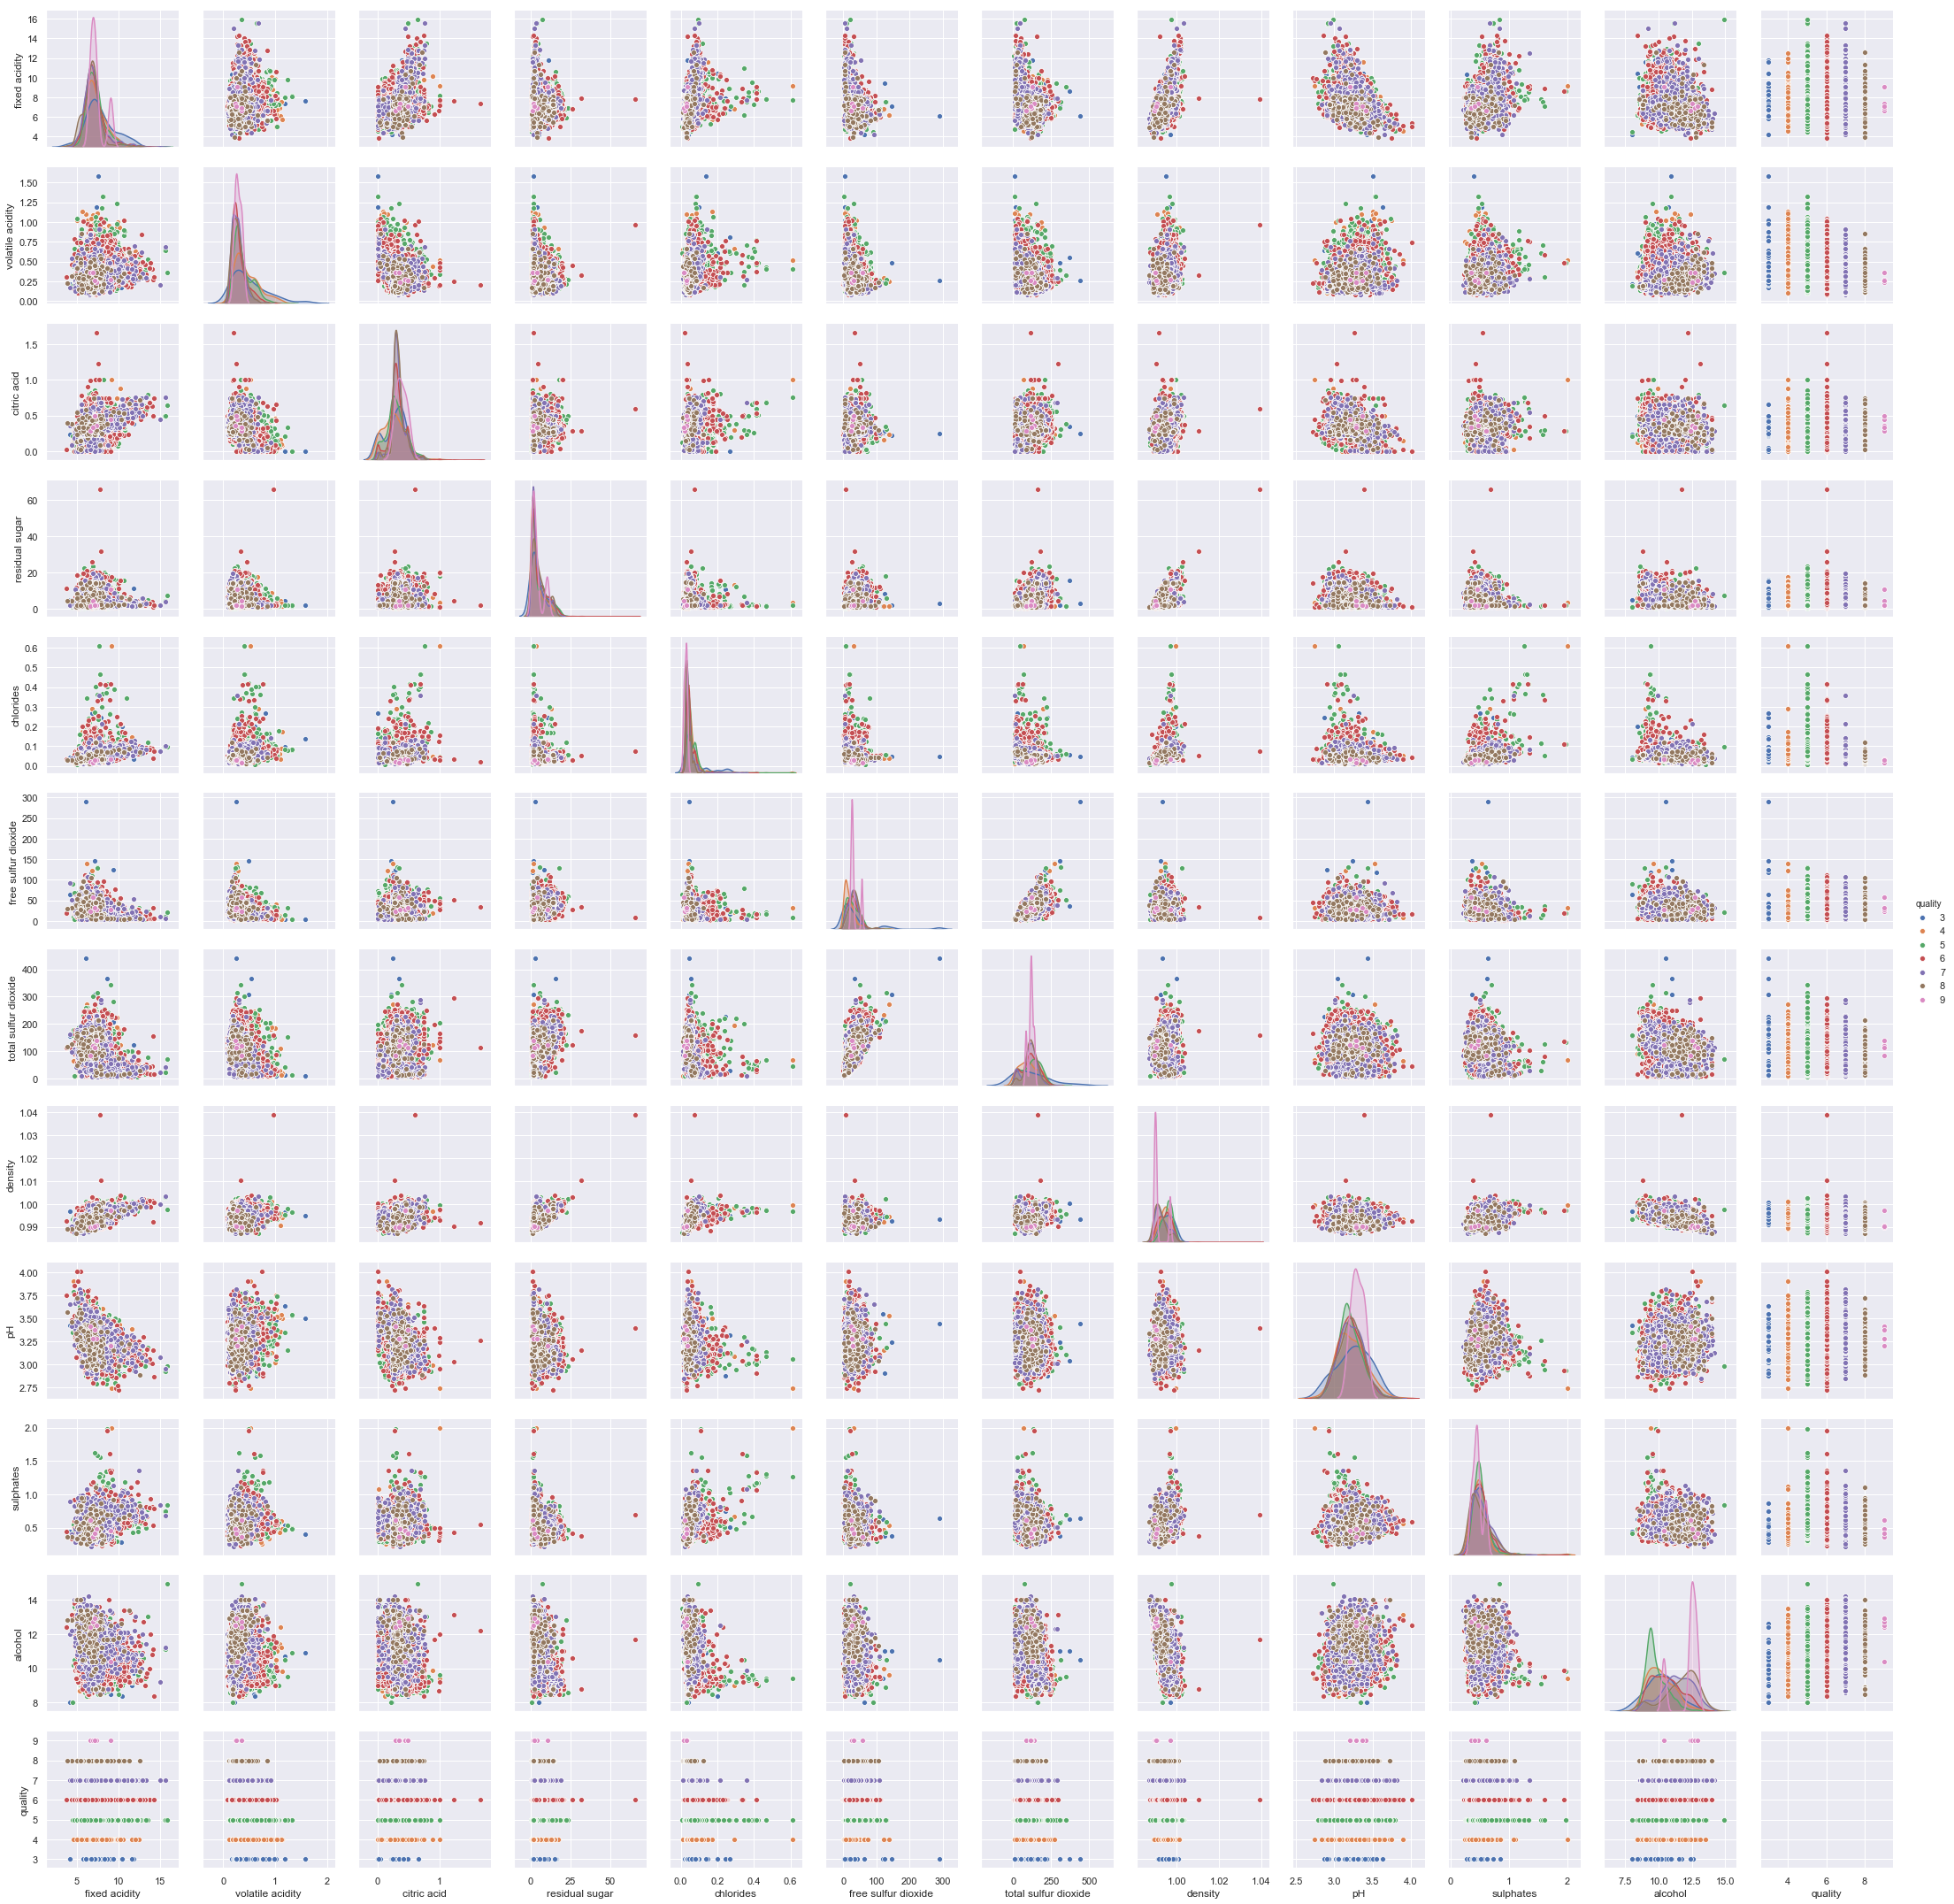

In [4]:
pairplot=sns.pairplot(df,hue="quality")

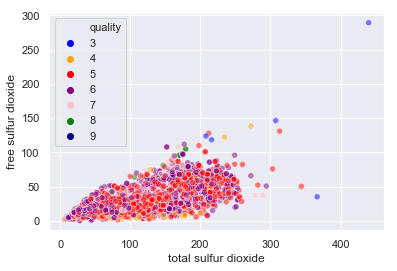

In [5]:
sns.scatterplot(data=df, x='total sulfur dioxide', y='free sulfur dioxide', hue='quality',palette=["blue","orange","red","purple","pink","green","navy"],alpha=0.5)


In [6]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#filling missing values with the mean of the colomun if the feature is numerical
for col in df:
    if(df[col].dtype!="object"):
        aux=df[col].mean() 
        df[col].fillna(aux,inplace=True)



In [8]:
y=df["quality"].values
df = pd.concat([df, pd.get_dummies(df["type"])], axis=1)


In [9]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'red', 'white'],
      dtype='object')

In [10]:
x=df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','red', 'white']].values


In [11]:
x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
print("x_train  ",x_train.shape)
print("y_train  ",y_train.shape)
print("x_test  ",x_test.shape)
print("y_test  ",y_test.shape)


x_train   (3898, 13)
y_train   (3898,)
x_test   (2599, 13)
y_test   (2599,)


In [13]:
k=4
classifier=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

In [14]:
y_pred=classifier.predict(x_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test set Accuracy:  0.556367833782224


In [15]:
k=10
n=k
acc_array=np.zeros(k)
for k in range(1,k+1):
    classifier=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1]=acc
max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
k+=1
print("The best accuracy was with", max_acc, "with k=",k) 

The best accuracy was with 0.593305117352828 with k= 1


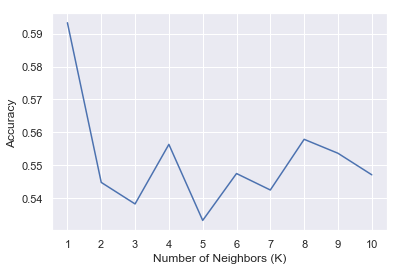

In [16]:
x=range(1,n+1)
y=acc_list
plt.plot(x,y)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.xticks(range(1,n+1))
plt.show()